In [1]:
from core import RootCore


In [2]:
# init
core = RootCore.RootCore(
    './data/detection_state_dict.pth',
    './data/score_state_dict.pth',
    '', # model encryption not implemented for now
    device_name='cpu'
)


In [3]:
# low level api
bboxes = core.detect('./data/1a375421-9b33-40fa-8750-8cb3dd9b2079.jpg')
score_bboxes = core.bbox_score('./data/1a375421-9b33-40fa-8750-8cb3dd9b2079.jpg', bboxes)
print(score_bboxes)


a1
a2
a3
a4
a5
a6


/home/voyager/anaconda3/envs/pytorch_0.4.1/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


[[122.17975616455078, 89.21537780761719, 295.94500732421875, 275.37518310546875, 79.5338134765625], [336.1812744140625, 126.92890930175781, 502.46484375, 364.1748352050781, 73.38341522216797]]


In [4]:
# high level api
all_in_one_score_bboxes = core.score('./data/1a375421-9b33-40fa-8750-8cb3dd9b2079.jpg')
print(all_in_one_score_bboxes)


[[121.57270812988281, 93.49104309082031, 318.7980651855469, 266.0303955078125, 71.68778991699219], [345.7875671386719, 148.32928466796875, 519.5787353515625, 361.6448669433594, 74.77831268310547]]


In [5]:
# draw
core.draw_score_bboxes('./data/1a375421-9b33-40fa-8750-8cb3dd9b2079.jpg', './result/', score_bboxes, draw_score=True)


'./result/1a375421-9b33-40fa-8750-8cb3dd9b2079.jpg'

bbox 0:
[121.57270812988281, 93.49104309082031, 318.7980651855469, 266.0303955078125, 71.68778991699219]
path: ./result/0-1a375421-9b33-40fa-8750-8cb3dd9b2079.jpg



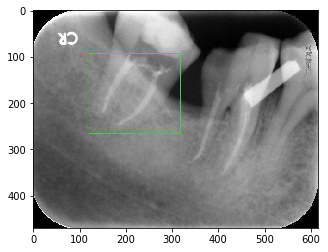

bbox 1:
[345.7875671386719, 148.32928466796875, 519.5787353515625, 361.6448669433594, 74.77831268310547]
path: ./result/1-1a375421-9b33-40fa-8750-8cb3dd9b2079.jpg



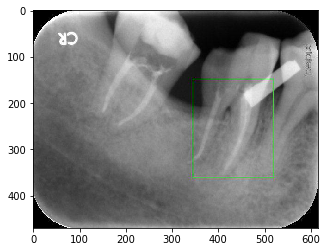

In [14]:
# ok, some customized draw

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

for i, score_bbox in enumerate(score_bboxes):
    result_file = core.draw_score_bboxes(
        './data/1a375421-9b33-40fa-8750-8cb3dd9b2079.jpg',
        './result/{}-'.format(i),
        [score_bbox],
        bbox_color_name='lime',
        draw_score=False
    )
    
    print('bbox {}:\n{}\npath: {}\n'.format(i, score_bbox, result_file))
    
    img = np.array(Image.open(result_file))
    plt.imshow(img)
    plt.show()
